# **Phishing_Website_Detection by ML**

## **1. Introduction:**
In this we will be using ML Algorithm(Random_Forest) to detect Phishing_website.

## **2. Import_Data:**

In [337]:
#Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [338]:
#Import_data
df = pd.read_csv('Phishing_data.csv')
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,...,1,0,-1,1,0,-1,0,1,0,0


## **3. Knowing_the_Data**
We will be showing univariant details of each column and get to know which are more relevant to our solution approach.

In [339]:
#Checking the shape of the dataset
df.shape

(2456, 31)

In [340]:
#Listing the features of the dataset
df.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [341]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            2456 non-null   int64
 1   URL_Length                   2456 non-null   int64
 2   Shortining_Service           2456 non-null   int64
 3   having_At_Symbol             2456 non-null   int64
 4   double_slash_redirecting     2456 non-null   int64
 5   Prefix_Suffix                2456 non-null   int64
 6   having_Sub_Domain            2456 non-null   int64
 7   SSLfinal_State               2456 non-null   int64
 8   Domain_registeration_length  2456 non-null   int64
 9   Favicon                      2456 non-null   int64
 10  port                         2456 non-null   int64
 11  HTTPS_token                  2456 non-null   int64
 12  Request_URL                  2456 non-null   int64
 13  URL_of_Anchor                2456 non-null   int

## **4. Data_visualisation**
We are drawing heat map using correlation matrix that tells us about how each column is dependent on one another and deleting similar columns.

In [342]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
#name of drop columns
to_drop

['Shortining_Service',
 'double_slash_redirecting',
 'SFH',
 'Redirect',
 'popUpWidnow']

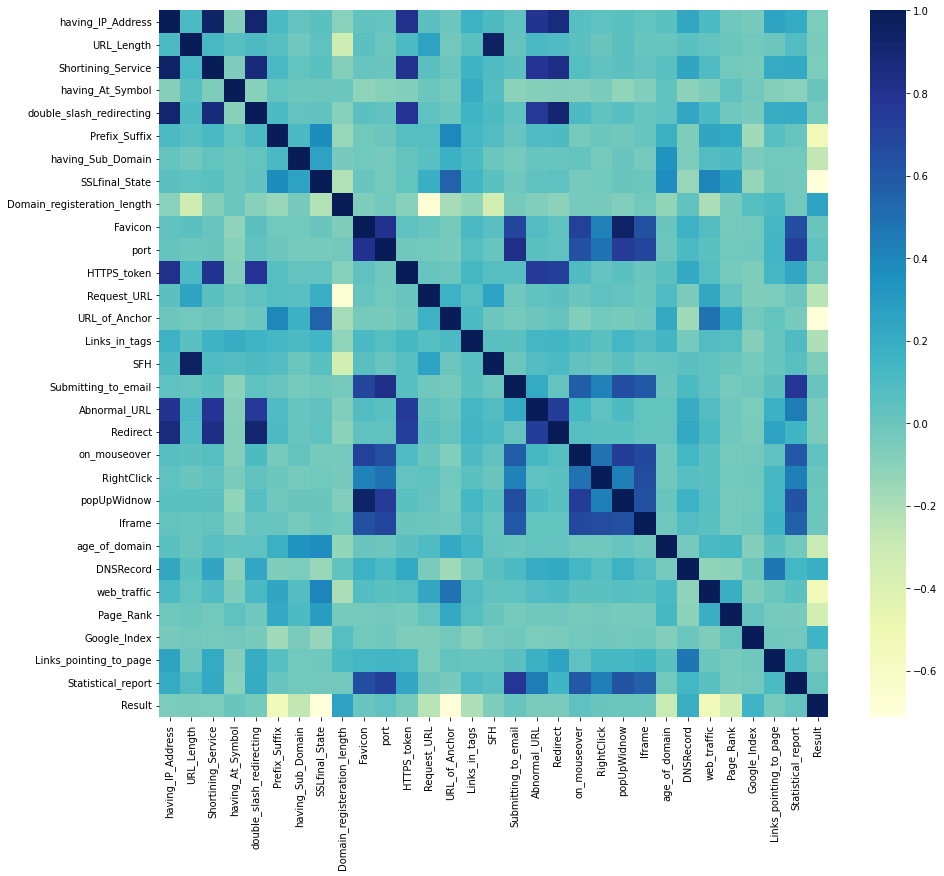

In [343]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(df.corr(),cmap="YlGnBu")
plt.show()

In [344]:
# Drop columns 
df_new=df.drop(df[to_drop], axis=1)
df_new

,having_IP_Address,URL_Length,having_At_Symbol,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,...,RightClick,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,-1,-1,-1,0,0,0,1,...,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,-1,0,1,0,0,0,1,...,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,-1,-1,-1,0,0,0,1,...,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,-1,-1,-1,1,0,0,1,...,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,0,-1,1,1,0,0,0,0,...,0,0,-1,1,0,-1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,0,-1,0,0,0,-1,1,0,0,0,...,0,0,-1,0,1,0,0,0,0,1
2452,0,-1,1,0,0,0,1,0,0,0,...,0,0,0,1,-1,0,0,1,0,1
2453,0,-1,0,0,0,1,0,0,0,0,...,0,0,-1,0,1,0,0,0,0,0
2454,0,-1,0,0,-1,-1,1,0,0,0,...,0,0,1,0,-1,-1,0,0,0,1


## **5. EDA and Data_cleaning**
Here, we clean the data by applying data cleaning techniques and transform the data to use it in the models.

In [345]:
df_new.describe()

,having_IP_Address,URL_Length,having_At_Symbol,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,...,RightClick,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,...,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000
mean,0.113192,-0.649837,0.054560,-0.254886,-0.185668,0.255700,0.018730,0.189739,0.135179,0.160423,...,0.042345,0.092020,-0.003257,0.536645,0.304560,-0.540717,0.139658,0.344463,0.179153,0.445440
std,0.316892,0.752690,0.227166,0.676170,0.802068,0.912332,0.798455,0.392175,0.341984,0.367073,...,0.201417,0.289112,0.939726,0.498757,0.834146,0.757832,0.346702,0.568911,0.383559,0.497115
min,0.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,0.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We have 30 features & a target column.

In [346]:
# Check for null values
df_new.isnull().values.any()

False

From the above execution, it is clear that the data doesnot have any missing values.

By this, the data is throughly preprocessed & is ready for training.

## **6. Training_of_data**

In [347]:
# Sepratating & assigning features and target columns to X & y
X = df_new.drop('Result',axis=1)
Y = df_new['Result']
X.shape, Y.shape

((2456, 25), (2456,))

In [348]:
# Splitting the dataset into train and test sets: 70-30 split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 12)
X_train.shape, X_test.shape

((1719, 25), (737, 25))

## **7. Random Forest Model**



In [349]:
#importing packages
from sklearn.metrics import accuracy_score
import itertools
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [350]:
# Creating holders to store the model performance results
#ML_Model = []
accuracy = []
precision = []
recall=[]
f1_score=[]


#function to call for storing the results
def storeResults(a,b,c,d):
  #ML_Model.append(model)
  accuracy.append(round(a, 3))
  precision.append(round(b, 3))
  recall.append(round(c, 3))
  f1_score.append(round(d, 3))

### **Random Forest Classifier**


In [351]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=100)

# fit the model 
forest.fit(X_train, Y_train)

RandomForestClassifier()

In [352]:
#predicting the target value from the model for the samples
Y_test_forest = forest.predict(X_test)
Y_train_forest = forest.predict(X_train)

**Performance Evaluation:**

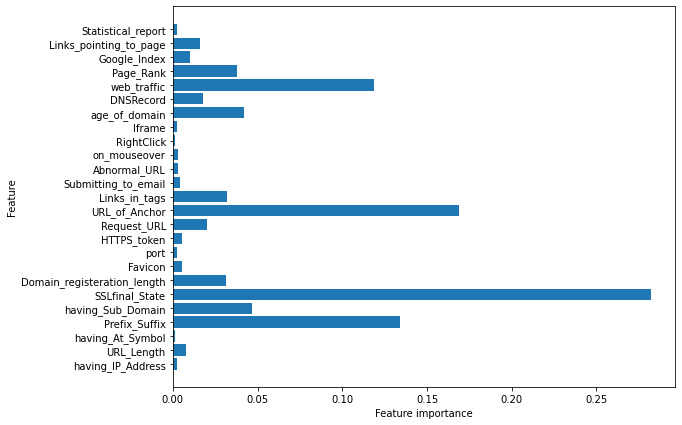

In [353]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [354]:
confusion_matrix_rf = confusion_matrix(Y_test, Y_test_forest)
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf,)

Confusion Matrix - Random Forest
[[391  11]
 [  8 327]]


In [355]:
print("tp,fp,tn,fn - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_test_forest).ravel()

accuracy_model  =(tp+tn)/(tp+tn+fp+fn)
precision_score =(tp)/(tp+fp)
recall_score  =(tp)/(tp+fn)
f1 =2*(( precision_score * recall_score)/( precision_score + recall_score))

tp,fp,tn,fn - Random Forest


In [356]:
classification_report_rf = classification_report(Y_test, Y_test_forest)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       402
           1       0.97      0.98      0.97       335

    accuracy                           0.97       737
   macro avg       0.97      0.97      0.97       737
weighted avg       0.97      0.97      0.97       737



**Storing the results:**

In [359]:
storeResults(accuracy_model,precision_score,recall_score,f1)

## **8. Accuracy of Models**
Here we have listed the accuracy,Precision,Recall,F1-Score.

In [360]:
#creating dataframe
results = pd.DataFrame({    
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score})
results

,Accuracy,Precision,Recall,F1-Score
0,0.974,0.967,0.976,0.972


<br>Random Forest Classifier Gives accuracy of 0.974 which is pretty good.
